<a href="https://colab.research.google.com/github/EkaterinaLap/-/blob/main/%D0%B4%D1%8E%D0%BD%D0%B0%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D1%8B%D0%BF%D0%B8%D1%82%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


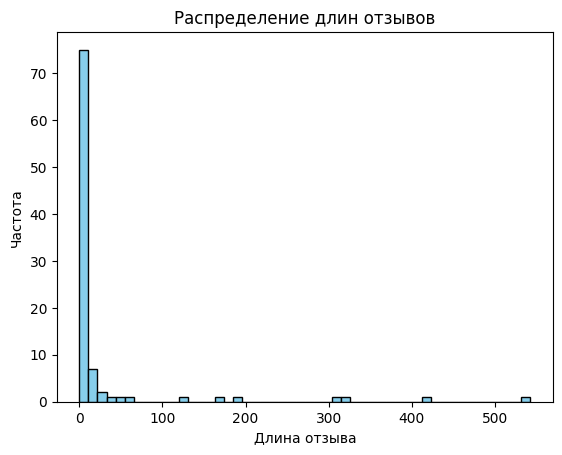

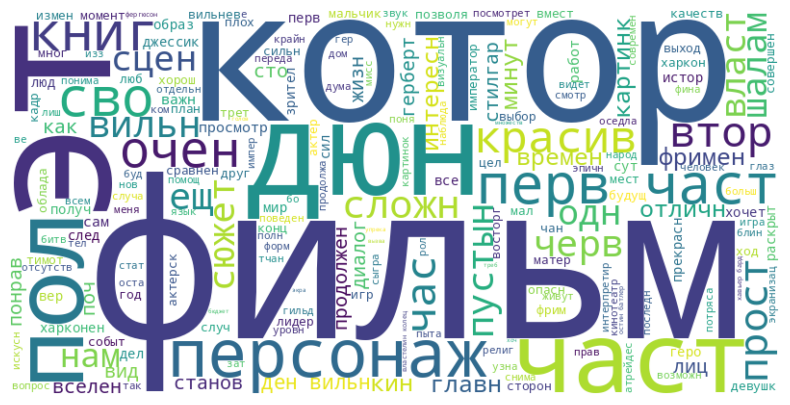

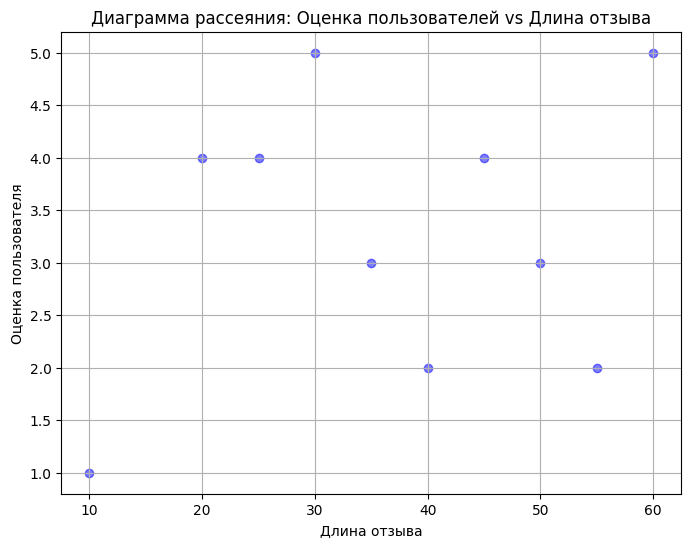

In [1]:
# Импорт необходимых библиотек
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import snowballstemmer

# Загрузка ресурсов NLTK для русского языка
nltk.download('punkt')
nltk.download('stopwords')

# Функция для предобработки текста
def preprocess_text(text):
    # Преобразование текста к нижнему регистру
    text = text.lower()

    # Удаление пунктуации
    text = ''.join([char for char in text if char not in string.punctuation])

    # Токенизация текста
    tokens = word_tokenize(text)

    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]

    # Стемминг текста
    stemmer = snowballstemmer.stemmer('russian')
    stemmed_tokens = stemmer.stemWords(tokens)

    # Приведение стемов к строке
    return ' '.join(stemmed_tokens)

# Функция для чтения данных из файла
def read_reviews_from_txt(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Функция для сохранения предобработанных отзывов в файл
def save_preprocessed_reviews(preprocessed_reviews, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        for review in preprocessed_reviews:
            file.write(review + '\n')

# Функция для визуализации облака слов
def plot_wordcloud(preprocessed_reviews):
    # Объединение предобработанных отзывов в одну строку
    text = " ".join(preprocessed_reviews)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Визуализация облака слов
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Основной код программы
input_file = 'text.txt'  # Путь к файлу с отзывами
output_file = 'preprocessed_reviews.txt'  # Путь к файлу для сохранения предобработанных отзывов

# Чтение отзывов из файла
reviews = read_reviews_from_txt(input_file)

# Предобработка отзывов
preprocessed_reviews = [preprocess_text(review) for review in reviews]

# Сохранение предобработанных отзывов в файл
save_preprocessed_reviews(preprocessed_reviews, output_file)

# Визуализация распределения длин отзывов
review_lengths = [len(review.split()) for review in preprocessed_reviews]
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Длина отзыва')
plt.ylabel('Частота')
plt.title('Распределение длин отзывов')
plt.show()

# Визуализация облака слов
plot_wordcloud(preprocessed_reviews)

# Создание диаграммы рассеяния
user_ratings = [4, 3, 5, 2, 4, 5, 3, 4, 2, 1]  # Пример оценок пользователей
review_lengths = [20, 50, 30, 40, 25, 60, 35, 45, 55, 10]  # Пример длин отзывов

plt.figure(figsize=(8, 6))
plt.scatter(review_lengths, user_ratings, color='blue', alpha=0.5)
plt.title('Диаграмма рассеяния: Оценка пользователей vs Длина отзыва')
plt.xlabel('Длина отзыва')
plt.ylabel('Оценка пользователя')
plt.grid(True)
plt.show()
